# Arithmetic Anagrams

Recently, I bumped into the following tweet from Neil deGrasse Tyson:

<blockquote class="twitter-tweet" lang="en"><p>Need a distraction today? Not only does 12+1=11+2, but the letters &quot;twelve plus one&quot; rearrange to give you &quot;eleven plus two&quot;</p>&mdash; Neil deGrasse Tyson (@neiltyson) <a href="https://twitter.com/neiltyson/status/144594005852831744">December 8, 2011</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

While neat, I wondered how often that occurs, and decided to [whip up some code](https://github.com/jackmaney/arithmetic_anagram) and find out.

Thankfully, the hard part--converting numbers to words (eg 21 to `"twenty one"`)--has already been done, thanks to a module called [inflect](https://pypi.python.org/pypi/inflect). 

I've built a few helper functions around the `number_to_words` function within `inflect` to find such arithmetic anagrams. In particular, it can be called from the command line. In particular, we can perform a sanity check against Dr. Tyson's tweet above:

    $ python arithmetic_anagram.py 13
      [####################################]  100%
    1 + 12 = 2 + 11

(the line with all of the "#"s in it is merely a progress bar that fills up in near real time).

Also, for example:

    $ python arithmetic_anagram.py 81
      [####################################]  100%
    2 + 79 = 9 + 72
    3 + 78 = 8 + 73
    4 + 77 = 7 + 74
    5 + 76 = 6 + 75
    14 + 67 = 17 + 64
    20 + 61 = 21 + 60
    22 + 59 = 29 + 52
    23 + 58 = 28 + 53
    24 + 57 = 27 + 54
    25 + 56 = 26 + 55
    30 + 51 = 31 + 50
    32 + 49 = 39 + 42
    33 + 48 = 38 + 43
    34 + 47 = 37 + 44
    35 + 46 = 36 + 45

In particular, how common are these sum anagrams? Well, to answer that, we have to know how many ways there are to choose pairs of pairs, each of which sum to a particular number (eg $(1, 12)$ and $(2, 13)$).

Fixing $n$, we want to find two pairs $(n_1, n_2), (m_1, m_2)$ of positive integers that add up to `n` (ie $n_1 + n_2 = m_1 + m_2 = n$). However, to keep down on redundancy, we'll also demand that:

* $n_1 \leq n_2$ and $m_1 \leq m_2$ (ie the pairs are essentially unordered pairs), and

* The pairs are distinct--in particular $n_1 \not= m_1$ (since otherwise $n_1 + n_2 = m_1 + m_2 = n$ forces $(n_1, n_2) = (m_1, m_2)$).

With that out of the way, it's clear that for any such pair, we have $1\leq n_1 \leq \lfloor \frac{n}{2} \rfloor$, and likewise for $m_1$. Thus, there are $ { {\lfloor n/2 \rfloor} \choose 2 } $ such pairs.

So, let's compute some frequencies of these anagram sum pairs.

In [8]:
import arithmetic_anagram
import pandas as pd # For displaying data via Data Frames
import math
import matplotlib
%matplotlib inline

In [2]:
def anagram_report(lower=1, upper=100):
    """
    Build a dataframe of the number of anagrams for sums adding to n, lower <= n <= upper, 
    only including those that have anagrams.
    """
    num_anagrams = []

    for n in range(lower, upper + 1):
        

        anagram_pairs = arithmetic_anagram.find_anagram_pairs(n, "+")

        if anagram_pairs:

            half_n = int(math.floor(n/2))
            num_possible_pairs = half_n * (half_n - 1) / 2

            num_anagrams.append([n, len(anagram_pairs), 100 * len(anagram_pairs) / float(num_possible_pairs) ])

    
    return pd.DataFrame(num_anagrams, columns=["n", "num_pairs", "pct_total_pairs"])

In [3]:
sum_anagrams = anagram_report()
sum_anagrams

,n,num_pairs,pct_total_pairs
0,13,1,6.666667
1,20,1,2.222222
2,21,1,2.222222
3,23,3,5.454545
4,24,1,1.515152
5,25,3,4.545455
6,26,3,3.846154
7,27,3,3.846154
8,28,3,3.296703
9,29,4,4.395604


So, 80 out of the first 100 integers have at least one sum anagram. How do the percentages look?

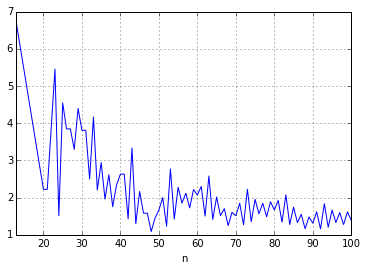

In [17]:
sum_anagrams.plot(x="n", y="pct_total_pairs", legend=None)

So, the proportion of anagram pairs is definitely on a decreasing trend, but its variance seems to stabalize. Let's get a larger sample, shall we?

In [ ]:
more_anagrams = anagram_report(lower=1, upper=1000)
more_anagrams

Let's take a look at those percentages

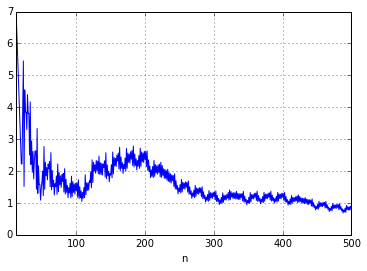

In [15]:
more_anagrams.plot(x="n", y="pct_total_pairs", legend=None)

In [10]:
int(17 / 2)

8

In [16]:
more_anagrams.plot?